# DUID Revenue comparison (Oct 2022 vs. Oct 2021)

This notebook identifies top 20 most earned dispatched units during Oct 2022. Then compared their earnings same time 2021.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# Oct 2022 data
Load22 = pd.read_csv(r".\PUBLIC_DVD_DISPATCHLOAD_202210010000.CSV", engine='python',skiprows=1, skipfooter=1)
Price22 = pd.read_csv(r".\PUBLIC_DVD_DISPATCHPRICE_202210010000.CSV", engine='python',skiprows=1, skipfooter=1)


In [4]:
# Oct 2021 data
Load21 = pd.read_csv(r".\PUBLIC_DVD_DISPATCHLOAD_202110010000.CSV", engine='python',skiprows=1, skipfooter=1)
Price21 = pd.read_csv(r".\PUBLIC_DVD_DISPATCHPRICE_202110010000.CSV", engine='python',skiprows=1, skipfooter=1)


In [5]:
# convert settlement data type to date time
Load22['SETTLEMENTDATE'] = pd.to_datetime(Load22['SETTLEMENTDATE'])
Price22['SETTLEMENTDATE'] = pd.to_datetime(Price22['SETTLEMENTDATE'])
Load21['SETTLEMENTDATE'] = pd.to_datetime(Load21['SETTLEMENTDATE'])
Price21['SETTLEMENTDATE'] = pd.to_datetime(Price21['SETTLEMENTDATE'])

In [6]:
# Select the required columns
col_load = ['SETTLEMENTDATE', 'DUID','DISPATCHINTERVAL','INITIALMW', 'TOTALCLEARED']
col_price = ['SETTLEMENTDATE', 'REGIONID', 'RRP']

In [7]:
Load22 = Load22[col_load]
Price22 = Price22[col_price]
Load21 = Load21[col_load]
Price21 = Price21[col_price]

In [8]:
# Join the dispatch load and prices
Rev_Oct_22 = pd.merge(Load22,Price22, on = "SETTLEMENTDATE", how = "left")
Rev_Oct_21 = pd.merge(Load21,Price21, on = "SETTLEMENTDATE", how = "left")

In [10]:
# Convert MW to MWH
Rev_Oct_22 ['TOTALCLEAREDMWH'] = Rev_Oct_22 ['TOTALCLEARED']/12
Rev_Oct_21 ['TOTALCLEAREDMWH'] = Rev_Oct_21 ['TOTALCLEARED']/12

In [11]:
# Calculate the revenue for each dispatch unit
Rev_Oct_22 ['REVENUE'] = Rev_Oct_22 ['TOTALCLEAREDMWH']*Rev_Oct_22 ['RRP']
Rev_Oct_21 ['REVENUE'] = Rev_Oct_21 ['TOTALCLEAREDMWH']*Rev_Oct_21 ['RRP']

In [20]:
# Total Revenue per DUID
sum_Rev_22 = Rev_Oct_22.groupby('DUID').sum().sort_values(by = 'REVENUE', ascending = False)
sum_Rev_22.reset_index(inplace = True)
sum_Rev_21 = Rev_Oct_21.groupby('DUID').sum().sort_values(by = 'REVENUE', ascending = False)
sum_Rev_21.reset_index(inplace = True)

In [125]:
df = pd.merge(sum_Rev_22,sum_Rev_21, on = 'DUID', how = 'left',suffixes=('_22', '_21') )

In [126]:
# Select the required columns
col = [ 'DUID','REVENUE_22', 'REVENUE_21']
df = df[col]

In [127]:
# Transpose Revenue
df = pd.melt(df, id_vars="DUID").rename(columns=str.title)

In [128]:
# Retrieve the top 20 for Oct 2022
df = df[df.Duid.isin(sum_Rev_22.iloc[:21,0])]
df

,Duid,Variable,Value
0,ER03,REVENUE_22,2.597244e+08
1,BW01,REVENUE_22,2.576402e+08
2,LOYYB1,REVENUE_22,2.560727e+08
3,LOYYB2,REVENUE_22,2.549905e+08
4,BW02,REVENUE_22,2.512529e+08
5,LYA3,REVENUE_22,2.503170e+08
6,LYA4,REVENUE_22,2.502455e+08
7,ER02,REVENUE_22,2.491517e+08
8,BW03,REVENUE_22,2.473346e+08
9,VP6,REVENUE_22,2.384243e+08


Visualizing the top 20 DUID with highest revenue during Oct 2022 and a comparison on how they did same time last year.

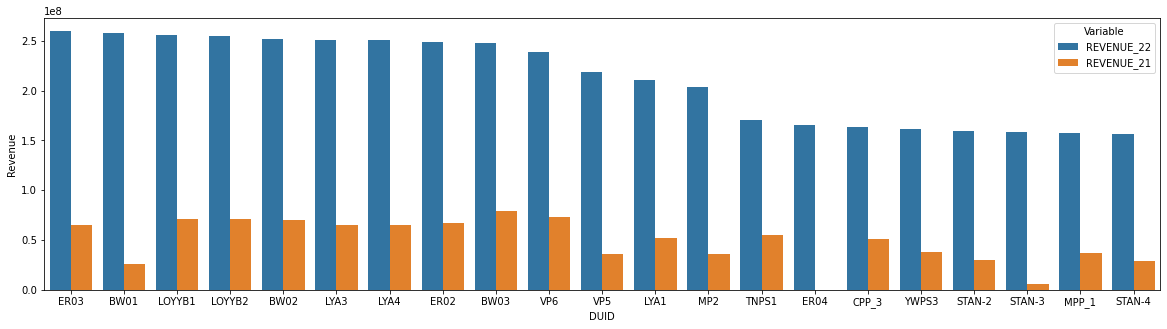

In [129]:
fig, ax = plt.subplots(figsize=(20, 5))
sb.barplot(data= df, x="Duid", y="Value", hue = "Variable")
ax.set_ylabel('Revenue')
ax.set_xlabel('DUID')
plt.show()

Lets check what are the fuel source, technology type of these DUID's are? and where are they located?

In [96]:
DUID_Info = pd.read_excel("NEM Registration and Exemption List (1).xlsx",sheet_name = "Generators and Scheduled Loads")

In [130]:
df = pd.merge(df.iloc[:21,:], DUID_Info, left_on ="Duid", right_on = "DUID",how = "left")

In [131]:
df

,Duid,Variable,Value,Participant,Station Name,Region,Dispatch Type,Category,Classification,Fuel Source - Primary,Fuel Source - Descriptor,Technology Type - Primary,Technology Type - Descriptor,Physical Unit No.,Unit Size (MW),Aggregation,DUID,Reg Cap (MW),Max Cap (MW),Max ROC/Min
0,ER03,REVENUE_22,2.597244e+08,Origin Energy Electricity Limited,Eraring Power Station,NSW1,Generator,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,3,720,Y,ER03,720,750,20
1,BW01,REVENUE_22,2.576402e+08,AGL Macquarie Pty Limited,Bayswater Power Station,NSW1,Generator,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,1,660,Y,BW01,660,700,140
2,LOYYB1,REVENUE_22,2.560727e+08,Alinta Energy Retail Sales Pty Ltd,Loy Yang B Power Station,VIC1,Generator,Market,Scheduled,Fossil,Brown Coal,Combustion,Steam Sub-Critical,1,500,Y,LOYYB1,500,600,110
3,LOYYB2,REVENUE_22,2.549905e+08,Alinta Energy Retail Sales Pty Ltd,Loy Yang B Power Station,VIC1,Generator,Market,Scheduled,Fossil,Brown Coal,Combustion,Steam Sub-Critical,2,500,Y,LOYYB2,500,600,110
4,BW02,REVENUE_22,2.512529e+08,AGL Macquarie Pty Limited,Bayswater Power Station,NSW1,Generator,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,2,660,Y,BW02,660,700,140
5,LYA3,REVENUE_22,2.503170e+08,AGL Loy Yang Marketing Pty Ltd,Loy Yang A Power Station,VIC1,Generator,Market,Scheduled,Fossil,Brown Coal,Combustion,Steam Sub-Critical,3,560,Y,LYA3,560,590,118
6,LYA4,REVENUE_22,2.502455e+08,AGL Loy Yang Marketing Pty Ltd,Loy Yang A Power Station,VIC1,Generator,Market,Scheduled,Fossil,Brown Coal,Combustion,Steam Sub-Critical,4,560,Y,LYA4,560,580,116
7,ER02,REVENUE_22,2.491517e+08,Origin Energy Electricity Limited,Eraring Power Station,NSW1,Generator,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,2,720,Y,ER02,720,750,20
8,BW03,REVENUE_22,2.473346e+08,AGL Macquarie Pty Limited,Bayswater Power Station,NSW1,Generator,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,3,660,Y,BW03,660,700,140
9,VP6,REVENUE_22,2.384243e+08,Delta Electricity,"Vales Point ""B"" Power Station",NSW1,Generator,Market,Scheduled,Fossil,Black Coal,Combustion,Steam Sub-Critical,6,660,Y,VP6,660,680,25


All these dispatch units fuel source are fossil, maily in NSW 

Text(0.5, 1.0, 'categorical_feature')

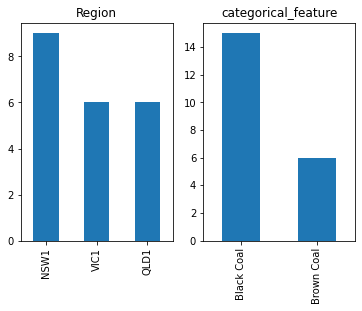

In [132]:
fig, ax = plt.subplots(1,2)
df['Region'].value_counts().plot(kind='bar' ,ax=ax[0]).set_title('Region')
df['Fuel Source - Descriptor'].value_counts().plot(kind='bar' ,ax=ax[1]).set_title('categorical_feature')
